In [16]:
%%capture
!pip3 install kornia

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

In [2]:
%%capture
!wget https://github.com/kornia/data/raw/main/arturito.jpg

In [3]:
img_bgr: np.array = cv2.imread('arturito.jpg')
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

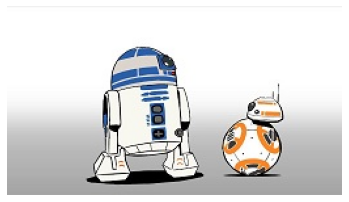

In [4]:
plt.imshow(img_rgb); plt.axis('off');

## Edges Detection

In [24]:
%%capture
!wget https://github.com/kornia/data/raw/main/doraemon.png

In [25]:
img_bgr2: np.ndarray = cv2.imread('doraemon.png', cv2.IMREAD_COLOR)

In [43]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr2)

In [44]:
x_bgr = x_bgr[None,...].float() / 255.

In [45]:
x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

In [46]:
x_gray = K.color.rgb_to_grayscale(x_rgb)

In [47]:
def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

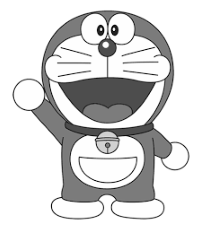

In [48]:
imshow(x_gray)

In [49]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=1)

In [50]:
grads

tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]]])

In [52]:
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

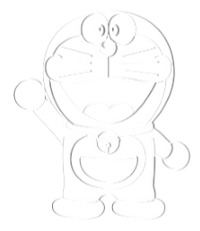

In [58]:
imshow(1. - grads_x.clamp(0., 1.))